#Lab Assignment - 2
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 03-03-2023    2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TA:

Shivam Kainth, 2020csz0006@iitrpr.ac.in



Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab2.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab2 then you should name the colab file as: ABC_2022csx1234_lab2.ipynb


**This assignment will focus on the implementation of TD learning methods viz. the Q-learning and SARSA Algorithms on selected OpenAI Gym environments.**

**Template code is provided for reference/help and is optional to use**

## CliffWalking Environment


```
 	

gym.make("CliffWalking-v0")
```



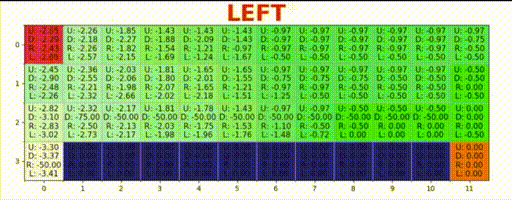

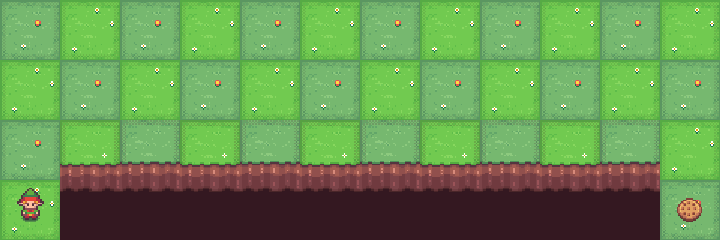

**Description**:


The board is a 4x12 matrix, with (using NumPy matrix indexing):

    [3, 0] as the start at bottom-left

    [3, 11] as the goal at bottom-right

    [3, 1..10] as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.

**Actions**

There are 4 discrete deterministic actions:

    0: move up

    1: move right

    2: move down

    3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.
    
    

In [2]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 29.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 94.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [3]:
!pip3 install imageio==2.4.1

!pip install --upgrade imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=fba6227aa857d260936e322327d42ac16e6b6f719ec09aecf264d5b470fa44de
  Stored in directory: /root/.cache/pip/wheels/be/7b/04/4d8d56f1d503e5c404f0de6018c0cfa592c71588a39b49e002
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 75.5 MB/s eta 0:00:00


In [4]:
import gymnasium as gym
import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))
import random
import matplotlib.pyplot as plt
import math
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

In [5]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        return img_bgr

In [6]:
#https://www.life2coding.com/convert-image-frames-video-file-using-opencv-python/ source for this code bit

def img_to_video(img_arr,path,fps):
  h,w,layers = img_arr[0].shape
  size = (w,h)
  out = cv2.VideoWriter(path,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
  for i in range(len(img_arr)):
    out.write(img_arr[i])
  out.release

In [7]:
#https://github.com/TUIlmenauAMS/Videocoding/blob/main/seminars/vc_seminar01_support.ipynb source for this code bit

def display_video(video,inter = 250):
    fig = plt.figure(figsize=(10,7))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=inter, repeat_delay=1000)

    plt.close()
    return anime

In [ ]:
env = gym.make('CliffWalking-v0',render_mode="human")
env.reset()


(36, {'prob': 1})

In [ ]:
print(env.action_space)


Discrete(4)


Taking 10 random steps in cliffwalking 

In [ ]:
for i in range(10):
  next_state, reward, done,_,__= env.step(np.random.randint(0,4))
  render()

#  Lunar Lander environment from OpenAI Gym. 
https://www.gymlibrary.dev/environments/box2d/lunar_lander/

**Description**

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. In the assignment we will be dealing with **Discrete** task. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.


**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

    the lander crashes (the lander body gets in contact with the moon);

    the lander gets outside of the viewport (x coordinate is greater than 1);

    the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body:


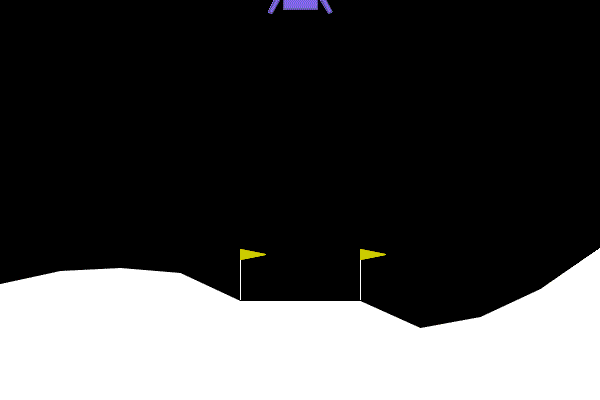

# Template code for running Lunar lander

In [ ]:
import gym
env = gym.make("LunarLander-v2",render_mode="human")

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.reset()
render()

In [ ]:
env.action_space

Discrete(4)

Taking random actions, we have to supply 4 actions to the agent. They have to be clipped between -1.0  to  1.0

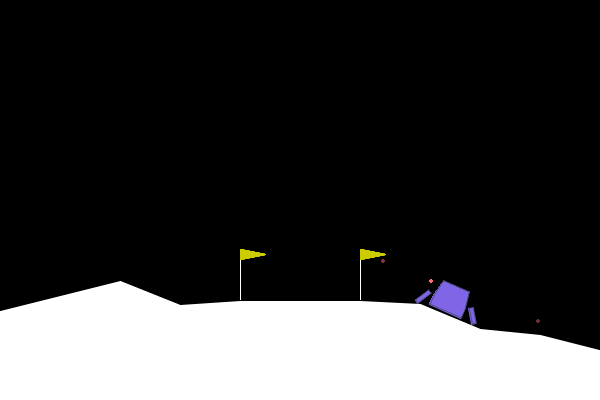

KeyboardInterrupt: ignored

In [ ]:
for i in range(100):
  next_state, reward, done,_= env.step(np.random.randint(0,4))
  render()

# Questions [Total 100 points]


## ***On Cliff-Walking*** 

Q1. Implement a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0005,0.005,0.01,0.07,0.1].  In each case, report the effect of $\alpha$ on Q-learning and demonstrate using plots. Plot the learning curve of the policies learnt in each case using  episode vs. avg reward/episode  **(20 points)**
 
Q2. Implement Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.95, 0.76, 0.55, 0.25, 0.1]. What is the effect of $\epsilon$ on the performance of Q-Learning?  Support your arguments with valuable statistics and graphs. You should create a graph of Epsilon with Average Q-values for start State(3,0) ,state(0,4) , state (1,7) and state(2,9). See the image included below. **(20 points)** 

Q3. What is the relationship/similarities between Purely Random policy and $ϵ$- greedy policy? Comment on the performance difference among these policies. Is Random Policy a special case of  $ϵ$-Greedy policy?  **(5 point)**

Q4.  Implement Q-Learning using the $\epsilon-$Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plot the learning curve of the policy being learnt using episode vs. avg reward/episode. **(10 points)**

***Note In all the above questions, render the cliff walking with the final learnt policy ***


States whose values to be plotted for Q2 

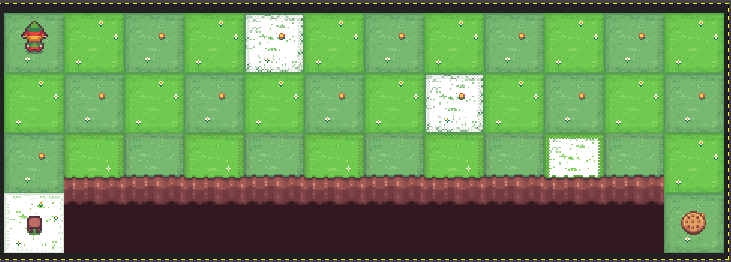



---



In [27]:
def plot_cumul_avg(ep,rew,alpha,epsilon,red = False):
  TCumR = 0
  
  avgCumR = []
  for i in range(len(rew)):
    TCumR += rew[i]
    avgCumR.append(TCumR/(i+1))
  plt.figure(figsize=(8,6))
  plt.plot(ep,avgCumR)
  plt.xlabel('episode number')
  plt.ylabel('avg of Total reward per episode up until epsiode')
  if red == False:
    plt.title('graph of average of total reward per episode up until episode vs number of epsiodes for alpha = '+str(alpha)+' and epsilon = '+str(epsilon))
  else:
    plt.title('graph of average of total reward per episode up until episode vs number of epsiodes for alpha = '+str(alpha)+'and reduced epsilon')
  plt.show()

In [62]:
def det_reward(Q):
  env = gym.make('CliffWalking-v0',render_mode="none")

  S = env.reset()[0]
  i = 0
  TR = 0
  while True:
    A = np.argmax(Q[S])
    # print(A,S)
    Sp ,R , is_Term, is_Trun, info = env.step(A)
    i+=1
    S = Sp
    TR+=R
    if is_Trun==True or is_Term == True:
      break
    if i>48:
      break
  return TR

In [75]:
def policy(Qs,num_actions,epsilon):
  p = random.random()
  if p<=epsilon:
    return random.randint(0,num_actions-1)
  else:
    return np.argmax(Qs)
  return 0

def q_learning(env,num_actions,num_states,alpha,epsilon,gamma = 1,red_epsilon=False,maxeps = 10000):
  Q = np.zeros((num_states,num_actions))
  for i in range(37):
    for j in range(num_actions):
      Q[i][j]=-20
  eps = 0
  RewpEps = []
  AvgRewpEps = []
  ep = []
  while eps<maxeps:
    if red_epsilon == True:
      epsilon = 1-0.99*eps/(maxeps-1)
    eps+=1
    S = (env.reset())[0]
    TR = 0
    steps = 0
    while True:
      A = policy(Q[S],num_actions,epsilon)

      Sp ,R , is_Term, is_Trun, info = env.step(A)
      TR+=R
      steps+=1
      Q[S][A] = Q[S][A] + alpha*(R + gamma*max(Q[Sp]) - Q[S][A])
      S = Sp
      
      if is_Term == True or is_Trun == True or steps>=1000:
        break
      
    RewpEps.append(TR)
    AvgRewpEps.append(TR/steps)
    ep.append(eps)
    print(eps)
    print(steps)
    print(TR)      

  return Q,RewpEps,ep

In [15]:
def render_video_cw(Q,path):
  env = gym.make('CliffWalking-v0',render_mode="human")

  imgArr = []

  S = env.reset()[0]
  i = 0
  while True:
    A = np.argmax(Q[S])
    # print(A,S)
    Sp ,R , is_Term, is_Trun, info = env.step(A)
    i+=1
    imgArr.append(render())
    S = Sp
    if is_Trun==True or is_Term == True:
      break
    if i>48:
      break

  (img_to_video(imgArr,path,4))


Q1

In [ ]:
import gymnasium as gym

env = gym.make('CliffWalking-v0',render_mode="none")
env.reset()

num_actions = env.action_space.n
num_states = env.observation_space.n

alphas = [0.0005,0.005,0.01,0.07,0.1]

cwq1 = []

for alpha in alphas:
  cwq1.append(q_learning(env,num_actions,num_states,alpha,1,maxeps=1000))

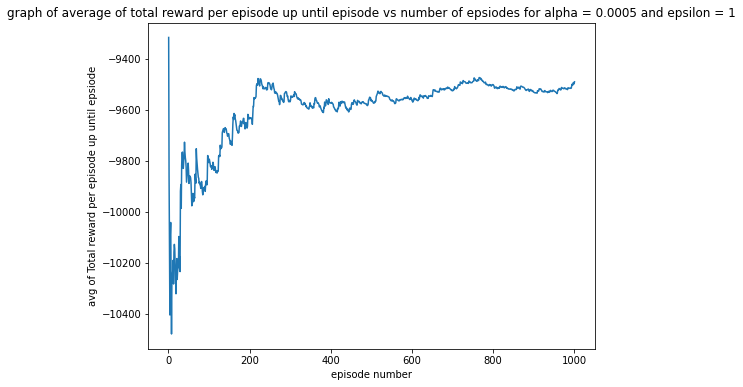

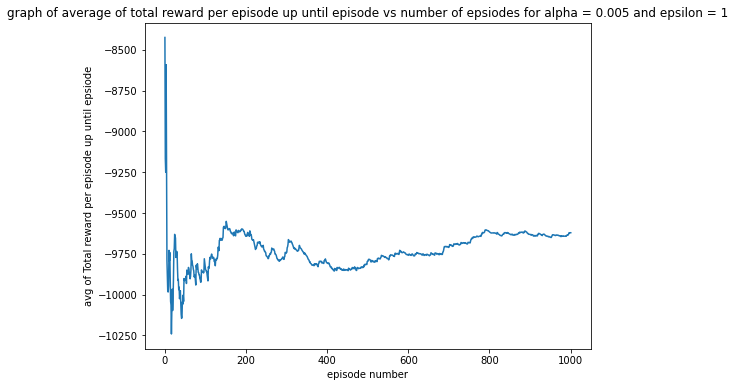

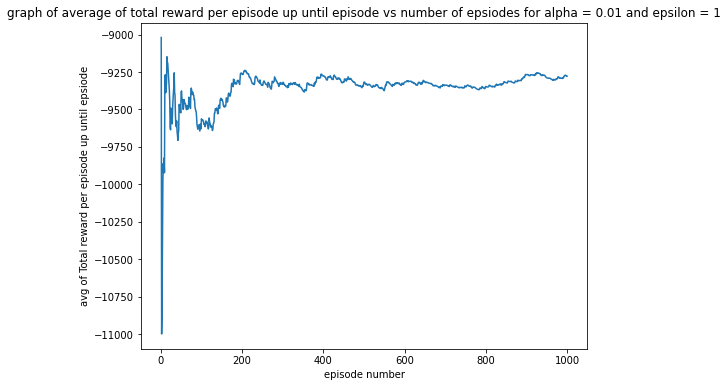

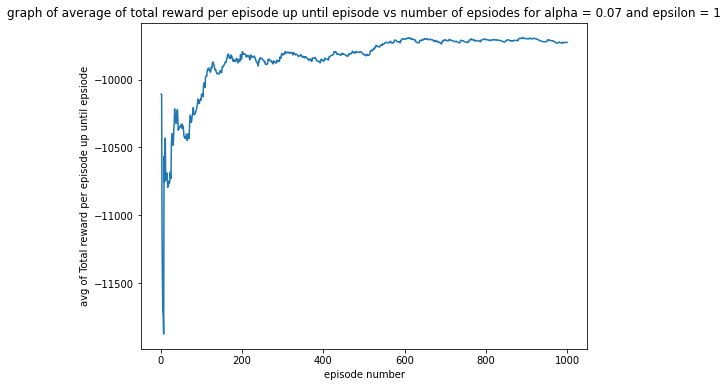

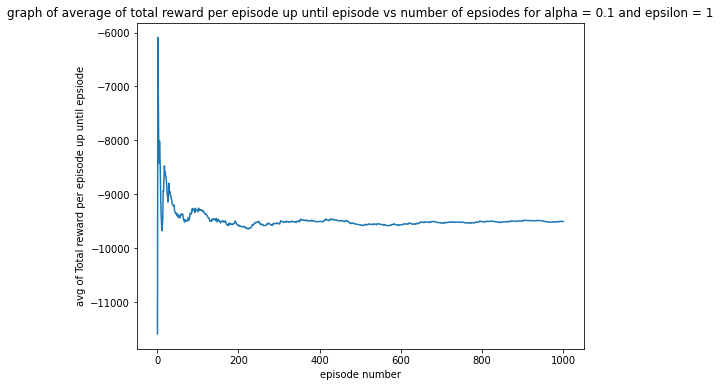

In [77]:
i=0

for alpha in alphas:
  plot_cumul_avg(cwq1[i][2],cwq1[i][1],alpha,1)
  i+=1

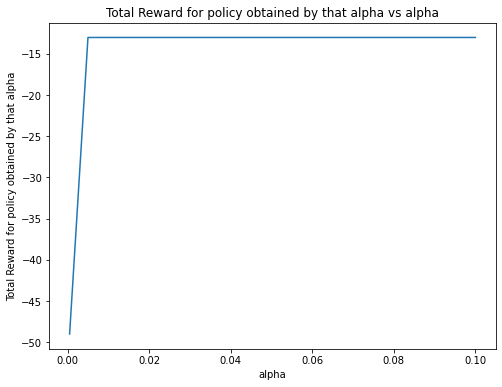

In [78]:
TRs = []
for i in range(5):
  TRs.append(det_reward(cwq1[i][0]))
plt.figure(figsize=(8,6))
plt.plot(alphas,TRs)
plt.xlabel('alpha')
plt.ylabel('Total Reward for policy obtained by that alpha')
plt.title('Total Reward for policy obtained by that alpha vs alpha')
plt.show()

In [93]:
path = './cwq10.mp4'

render_video_cw(cwq1[0][0],path)

video = imageio.mimread(path)
print('Render video for alpha = '+str(alphas[0]))
HTML(display_video(video).to_html5_video())

Render video for alpha = 0.0005


In [94]:
path = './cwq11.mp4'

render_video_cw(cwq1[1][0],path)

video = imageio.mimread(path)
print('Render video for alpha = '+str(alphas[1]))
HTML(display_video(video).to_html5_video())

Render video for alpha = 0.005


In [95]:
path = './cwq12.mp4'

render_video_cw(cwq1[2][0],path)

video = imageio.mimread(path)
print('Render video for alpha = '+str(alphas[2]))
HTML(display_video(video).to_html5_video())

Render video for alpha = 0.01


In [96]:
path = './cwq13.mp4'

render_video_cw(cwq1[3][0],path)

video = imageio.mimread(path)
print('Render video for alpha = '+str(alphas[3]))
HTML(display_video(video).to_html5_video())

Render video for alpha = 0.07


In [97]:
path = './cwq14.mp4'

render_video_cw(cwq1[4][0],path)

video = imageio.mimread(path)
print('Render video for alpha = '+str(alphas[4]))
HTML(display_video(video).to_html5_video())

Render video for alpha = 0.1


From the above graphs and renders we can see that as aplha increases the policy converges towards the optimal policy. So for smaller alpha the policy converges slowly as compared to larger alphas.

Q2

In [71]:
import time

In [ ]:
import gymnasium as gym

env = gym.make('CliffWalking-v0',render_mode="none")
env.reset()

num_actions = env.action_space.n
num_states = env.observation_space.n

epsilons  = [0.95, 0.76, 0.55, 0.25, 0.1]

cwq2 = []
timetaken = []

for epsilon in epsilons:
  start = time.time()
  cwq2.append(q_learning(env,num_actions,num_states,0.0001,epsilon,maxeps=10000))
  end = time.time()
  timetaken.append(end-start)

states = [36, 4, 19, 33]

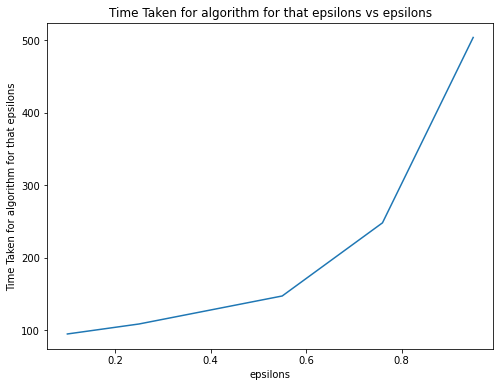

In [81]:
plt.figure(figsize=(8,6))
plt.plot(epsilons,timetaken)
plt.xlabel('epsilons')
plt.ylabel('Time Taken for algorithm for that epsilons')
plt.title('Time Taken for algorithm for that epsilons vs epsilons')
plt.show()

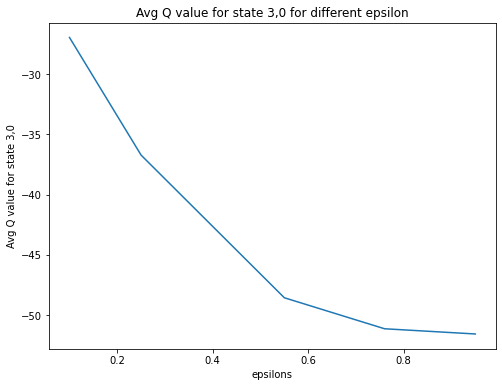

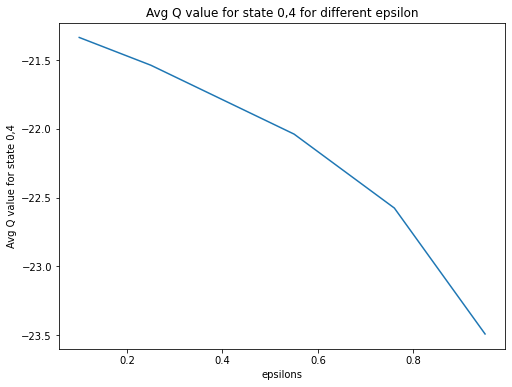

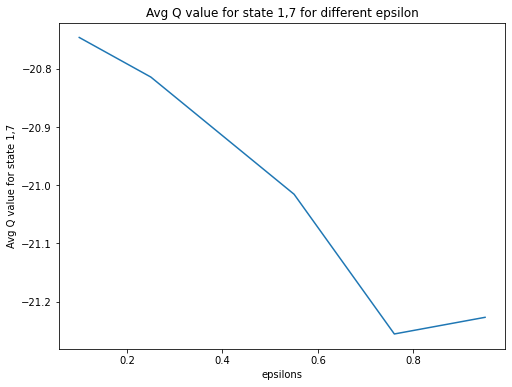

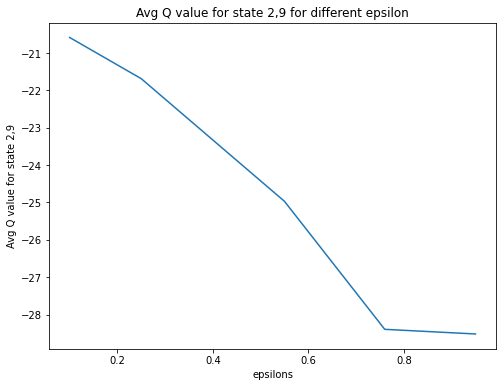

In [83]:
for state in states:
  avgQsas = []
  j=0
  for epsilon in epsilons:
    avgQsa = 0
    for i in range(4):
      avgQsa+=cwq2[j][0][state][i]
    avgQsa/=4
    avgQsas.append(avgQsa)
    j+=1
  plt.figure(figsize=(8,6))
  plt.plot(epsilons,avgQsas)
  plt.xlabel('epsilons')
  plt.ylabel('Avg Q value for state '+str(state//12)+','+str(state%12))
  plt.title('Avg Q value for state '+str(state//12)+','+str(state%12)+' for different epsilon')
  plt.show()

In [98]:
path = './cwq20.mp4'

render_video_cw(cwq2[0][0],path)

video = imageio.mimread(path)
print('Render video for epsilon = '+str(epsilons[0]))
HTML(display_video(video).to_html5_video())

Render video for epsilon = 0.95


In [99]:
path = './cwq21.mp4'

render_video_cw(cwq2[1][0],path)

video = imageio.mimread(path)
print('Render video for epsilon = '+str(epsilons[1]))
HTML(display_video(video).to_html5_video())

Render video for epsilon = 0.76


In [100]:
path = './cwq22.mp4'

render_video_cw(cwq2[2][0],path)

video = imageio.mimread(path)
print('Render video for epsilon = '+str(epsilons[2]))
HTML(display_video(video).to_html5_video())

Render video for epsilon = 0.55


In [101]:
path = './cwq23.mp4'

render_video_cw(cwq2[3][0],path)

video = imageio.mimread(path)
print('Render video for epsilon = '+str(epsilons[3]))
HTML(display_video(video).to_html5_video())

Render video for epsilon = 0.25


In [102]:
path = './cwq24.mp4'

render_video_cw(cwq2[4][0],path)

video = imageio.mimread(path)
print('Render video for epsilon = '+str(epsilons[4]))
HTML(display_video(video).to_html5_video())

Render video for epsilon = 0.1


For higher values of epsilon we get the correct policy, from this we can conclude that Q-Learning algorithm converges faster for hihger values of epsilon as compared to lower values of epsilon

Q3

As we can see that random policy is basically an epsilon greedy policy with epsilon = 1 and we run random policy for 1000 iterations compared to 10000 for epsilon greedy. Difference is that random policy reacher terminal point after a lot more steps as compared to epsilon = 0.1 case but is similar and comparable to epsilon = 0.95 in this aspect. So we can say that random policy is a special case of epsilon greedy policy.

Q4

In [ ]:
import gymnasium as gym

env = gym.make('CliffWalking-v0',render_mode="none")
env.reset()

num_actions = env.action_space.n
num_states = env.observation_space.n

Qq4 = q_learning(env,num_actions,num_states,0.01,1,maxeps=50000, red_epsilon=True)

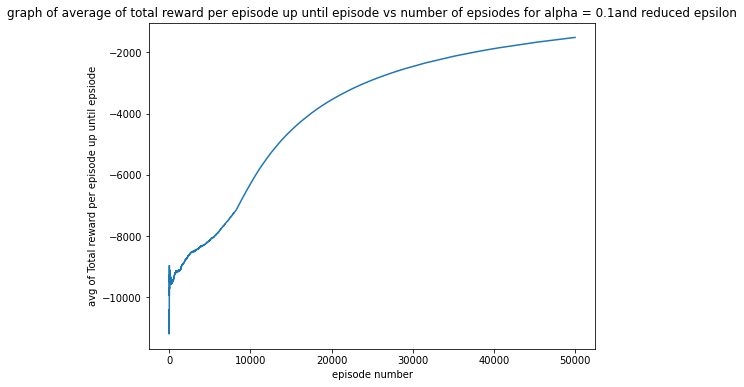

In [105]:
plot_cumul_avg(Qq4[2],Qq4[1],0.01,1,red=True)

In [106]:
path = './cwq4.mp4'

render_video_cw(Qq4[0],path)

video = imageio.mimread(path)
print('Render video for reduced epsilon')
HTML(display_video(video).to_html5_video())

Render video for reduced epsilon


## ***On Lunar Lander (Box 2D)*** 

Q1. Consider $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implement SARSA and Expected SARSA. Plot the graphs for:  episode vs. max-time step and episode vs. average-reward in each case. State your observations. Render 3 videos for the initial, mid and final stages of the learning process for both the methods. **(20 points).**

Q2. Experiment with different $\alpha$ = [0.0005,0.005,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discuss how changing $\alpha$ and $\epsilon$ affect the agent’s learning performance. Include graphs to help with your explanation. Also comment on best combination along with rendering its video. **(15 points).**


Q3. Implement SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous question Q2. Compare the performance of SARSA($\lambda$) with that of plain SARSA algorithm. **(10 points).**

In [8]:
def policy(Qs,num_actions,epsilon):
  p = random.random()
  if p<=epsilon:
    return random.randint(0,num_actions-1)
  else:
    return np.argmax(Qs)
  return 0

def stateToStateNo(state,Divs,LH,DivSize):
  StateNo = 0
  div = 1
  dim = len(Divs)
  for i in range(6):
    StateNo+=max(0,min(Divs[i]-1,math.floor((state[i]+Divs[i]*DivSize[i]/2)/DivSize[i])))*div
    div*=Divs[i]
  for i in range(6,8):
    StateNo+=int(state[i])*div
    div*=Divs[i]
  return StateNo

# the inspiration for the descretization function came from https://github.com/rogerxcn/lunar_lander_project/blob/master/sarsa_agent.py

def sarsa(env,num_actions,alpha,epsilon,gamma = 1,red_epsilon=False,maxeps = 10000,expected=False):
  Divs = [7,7,5,5,5,5,2,2]
  DivSize = [0.05,0.1,0.1,0.1,0.1,0.1]
  
  num_states = 1
  for div in Divs:
    num_states*=div
  print(num_states)
  Q = np.zeros((num_states,num_actions))
  print(np.shape(Q))
  LH = []
  LH.append(env.observation_space.low)
  LH.append(env.observation_space.high)
  
  eps = 0
  RewpEps = []
  AvgRewpEps = []
  ep = []
  Nstep = []
  
  while eps<maxeps:
    eps+=1
    S = (env.reset())[0]
    S = stateToStateNo(S,Divs,LH,DivSize)
    A = policy(Q[S],num_actions,epsilon)
    TR = 0
    steps = 0
    while True:
      
      Sp ,R , is_Term, is_Trun, info = env.step(A)
      Sp = stateToStateNo(Sp,Divs,LH,DivSize)
      TR+=R
      steps+=1

      Ap = policy(Q[Sp],num_actions,epsilon)

      if expected == False:
        
        Q[S][A] = Q[S][A] + alpha*(R + gamma*Q[Sp][Ap] - Q[S][A])
      else :
        Q[S][A] = Q[S][A] + alpha*(R + gamma*(1-epsilon)*Q[Sp][Ap] - Q[S][A])
        for i in range(num_actions):
          Q[S][A]+= alpha*gamma*epsilon/num_actions*Q[Sp][i]
      S = Sp
      A = Ap
      if is_Term == True or is_Trun == True:
        break
    if eps == maxeps//5:
      Qi = Q.copy()
    if eps == maxeps//2:
      Qm = Q.copy()
    RewpEps.append(TR)
    AvgRewpEps.append(TR/steps)
    ep.append(eps)
    Nstep.append(steps)
    print(eps)
    print(steps)
    print(TR)
    
     

  return Q,RewpEps,ep,Nstep,Qi,Qm

In [9]:
def avg_reward(Q,Divs,DivSize,ss=20):
  import gymnasium as gym

  env = gym.make("LunarLander-v2",render_mode="none")

  LH = []
  LH.append(env.observation_space.low)
  LH.append(env.observation_space.high)

  rewardSum = 0

  for i in range(ss):
    S = env.reset()[0]
    S = stateToStateNo(S,Divs,LH,DivSize)
    

    TR=0

    while True:
      A = np.argmax(Q[S])
      
      Sp ,R , is_Term, is_Trun, info = env.step(A)
      TR+=R
      
      Sp = stateToStateNo(Sp,Divs,LH,DivSize)
      
      S = Sp
      if is_Trun==True or is_Term == True:
        break
    rewardSum+=TR
  rewardSum/=ss
  return rewardSum


In [10]:
def render_video_ll(Q,Divs,DivSize,path):
  import gymnasium as gym

  env = gym.make("LunarLander-v2",render_mode="human")

  imgArr = []

  LH = []
  LH.append(env.observation_space.low)
  LH.append(env.observation_space.high)

  S = env.reset()[0]
  S = stateToStateNo(S,Divs,LH,DivSize)
  i = 0

  TR=0

  while True:
    A = np.argmax(Q[S])
    # print(A,S)
    Sp ,R , is_Term, is_Trun, info = env.step(A)
    TR+=R
    # print(TR)
    # print(Sp)
    Sp = stateToStateNo(Sp,Divs,LH,DivSize)
    imgArr.append(render())
    i+=1
    S = Sp
    if is_Trun==True or is_Term == True:
      break

  (img_to_video(imgArr,path,30))

  print(TR)

Q1

SARSA

In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2",render_mode="none")


num_actions = env.action_space.n

llq11 = sarsa(env,num_actions,0.01,0.1,maxeps=12000)

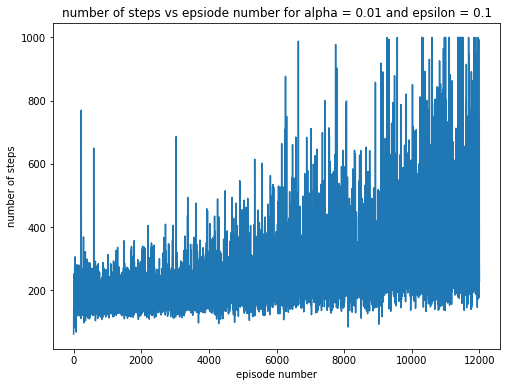

In [152]:
plt.figure(figsize=(8,6))
plt.plot(llq11[2],llq11[3])
plt.xlabel('episode number')
plt.ylabel('number of steps')
plt.title('number of steps vs epsiode number for alpha = 0.01 and epsilon = 0.1')
plt.show()

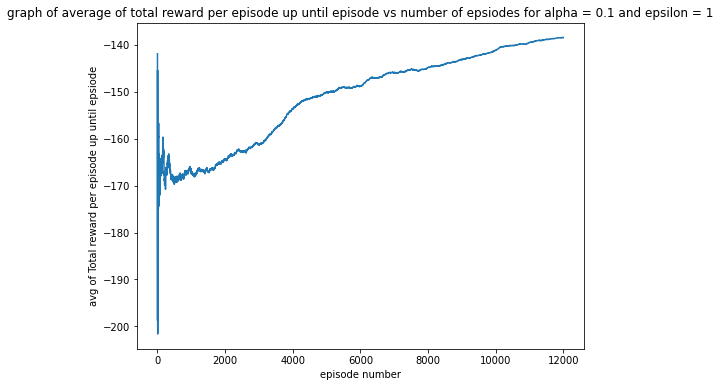

In [153]:
plot_cumul_avg(llq11[2],llq11[1],0.01,1)

In [144]:
Divs = [7,7,5,5,5,5,2,2]
DivSize = [0.05,0.1,0.1,0.1,0.1,0.1]

In [154]:
path = './llq111.mp4'

render_video_ll(llq11[4],Divs,DivSize,path)

video = imageio.mimread(path)
print('Render video for initial stages')
HTML(display_video(video,inter=80).to_html5_video())

-54.79942920851536
Render video for initial stages


In [156]:
path = './llq112.mp4'

render_video_ll(llq11[5],Divs,DivSize,path)

video = imageio.mimread(path)
print('Render video for middle stages')
HTML(display_video(video,inter=50).to_html5_video())

-241.1744673966777
Render video for middle stages


In [172]:
path = './llq110.mp4'

render_video_ll(llq11[0],Divs,DivSize,path)

video = imageio.mimread(path,memtest=False)
print('Final Render video')
HTML(display_video(video,inter=80).to_html5_video())

-18.551231083057132
Final Render video


Expected SARSA

In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2",render_mode="none")


num_actions = env.action_space.n

llq12 = sarsa(env,num_actions,0.01,0.1,maxeps=10000,expected=True)

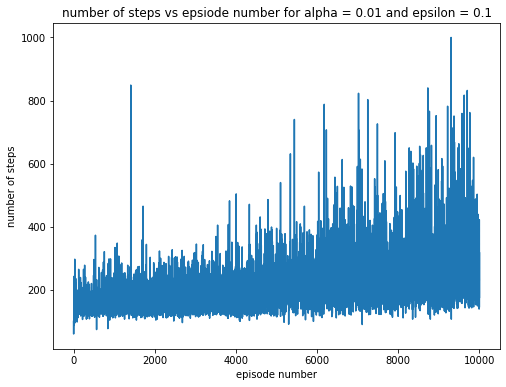

In [19]:
plt.figure(figsize=(8,6))
plt.plot(llq12[2],llq12[3])
plt.xlabel('episode number')
plt.ylabel('number of steps')
plt.title('number of steps vs epsiode number for alpha = 0.01 and epsilon = 0.1')
plt.show()

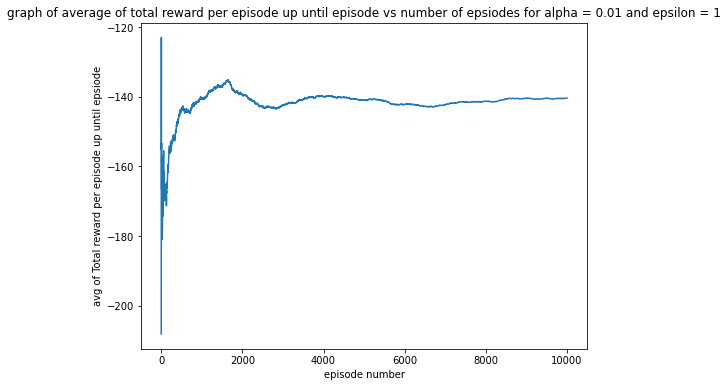

In [28]:
plot_cumul_avg(llq12[2],llq12[1],0.01,1)

In [15]:
Divs = [7,7,5,5,5,5,2,2]
DivSize = [0.05,0.1,0.1,0.1,0.1,0.1]

In [30]:
path = './llq121.mp4'

render_video_ll(llq12[4],Divs,DivSize,path)

video = imageio.mimread(path)
print('Render video for initial stages')
HTML(display_video(video,inter=80).to_html5_video())

-318.15025119786213
Render video for initial stages


In [31]:
path = './llq122.mp4'

render_video_ll(llq12[5],Divs,DivSize,path)

video = imageio.mimread(path)
print('Render video for middle stages')
HTML(display_video(video,inter=80).to_html5_video())

-141.0501363597006
Render video for middle stages


In [33]:
path = './llq120.mp4'

render_video_ll(llq12[0],Divs,DivSize,path)

video = imageio.mimread(path)
print('Final Render video')
HTML(display_video(video,inter=80).to_html5_video())

-152.35509750567465
Final Render video


In the initial render its learning to balance itself in the states near initial state but hasn't learnt much about states farther from initial states.
In the middle render it has learnt about the upper states and we can see it's learning to balance in the lower states
In the final render it can balance itself throughout but fails to land without crashing. 

Q2

In [173]:
alphas  = [0.0005,0.005,0.01,0.1] 
epsilons = [0.9, 0.5, 0.3, 0.1]

In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2",render_mode="none")

num_actions = env.action_space.n

llq21 = []


for alpha in alphas:
  llq21p = []
  
  for epsilon in epsilons:
    llq21p.append(sarsa(env,num_actions,alpha,epsilon,maxeps=2000))
    
  llq21.append(llq21p)
  

In [ ]:
llq22 = []

for alpha in alphas:
  
  llq22p = []
  for epsilon in epsilons:
    llq22p.append(sarsa(env,num_actions,alpha,epsilon,maxeps=2000,expected=True))
  llq22.append(llq22p)

In [ ]:
Ar1 = np.zeros((4,4))
Ar2 = np.zeros((4,4))

for i in range(4):
  for j in range(4):
    Ar1[i][j] = avg_reward(llq21[i][j][0],Divs,DivSize)
    Ar2[i][j] = avg_reward(llq22[i][j][0],Divs,DivSize)
    print(i,j)

SARSA

In [182]:
print(Ar1)

[[-411.08835162 -252.42489701 -320.54524572 -210.29266249]
 [-463.12668777 -246.12240307 -183.80995298 -298.27944775]
 [-346.47593123 -188.72213072 -199.91163944 -230.33394357]
 [-305.90772231 -179.52753852 -156.51307791  -99.46414843]]


For Sarsa


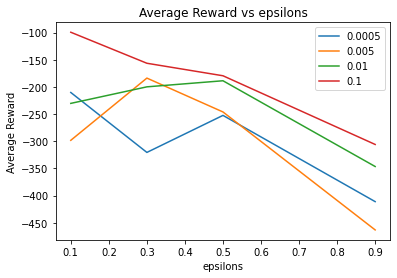

In [183]:
print('For Sarsa')

plt.plot(epsilons,Ar1[0])
plt.plot(epsilons,Ar1[1])
plt.plot(epsilons,Ar1[2])
plt.plot(epsilons,Ar1[3])
plt.xlabel('epsilons')
plt.ylabel('Average Reward')
plt.title('Average Reward vs epsilons')
plt.legend([str(alphas[0]),str(alphas[1]),str(alphas[2]),str(alphas[3])])

For Sarsa


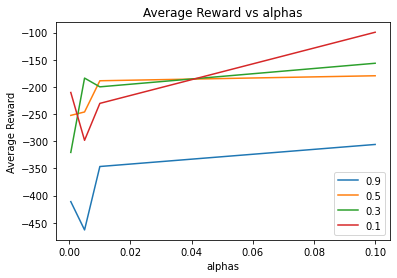

In [184]:
print('For Sarsa')

plt.plot(alphas,Ar1[:,0])
plt.plot(alphas,Ar1[:,1])
plt.plot(alphas,Ar1[:,2])
plt.plot(alphas,Ar1[:,3])
plt.xlabel('alphas')
plt.ylabel('Average Reward')
plt.title('Average Reward vs alphas')
plt.legend([str(epsilons[0]),str(epsilons[1]),str(epsilons[2]),str(epsilons[3])])

Expected SARSA

In [185]:
print(Ar2)

[[-442.58670512 -244.32595776 -269.51399818 -207.44323898]
 [-489.48941663 -207.73593383 -311.85271963 -172.00087702]
 [-403.76895885 -206.57917704 -224.659317   -204.63715711]
 [-375.37476419 -212.00271956 -214.69177299 -134.184097  ]]


For expected Sarsa


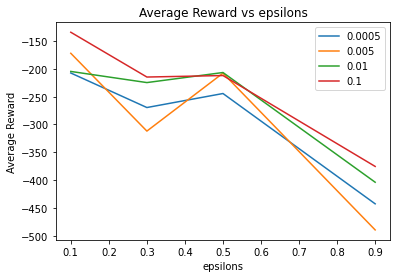

In [186]:
print('For expected Sarsa')

plt.plot(epsilons,Ar2[0])
plt.plot(epsilons,Ar2[1])
plt.plot(epsilons,Ar2[2])
plt.plot(epsilons,Ar2[3])
plt.xlabel('epsilons')
plt.ylabel('Average Reward')
plt.title('Average Reward vs epsilons')
plt.legend([str(alphas[0]),str(alphas[1]),str(alphas[2]),str(alphas[3])])

For expected Sarsa


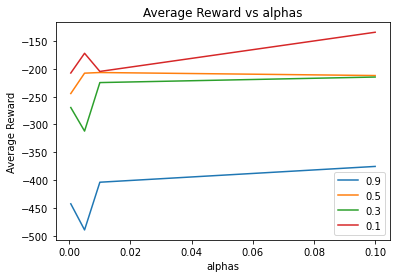

In [187]:
print('For expected Sarsa')

plt.plot(alphas,Ar2[:,0])
plt.plot(alphas,Ar2[:,1])
plt.plot(alphas,Ar2[:,2])
plt.plot(alphas,Ar2[:,3])
plt.xlabel('alphas')
plt.ylabel('Average Reward')
plt.title('Average Reward vs alphas')
plt.legend([str(epsilons[0]),str(epsilons[1]),str(epsilons[2]),str(epsilons[3])])

As we can see from the graph optimal alpha = 0.1 and optimal epsilon = 0.1 for both sarsa and expected sarsa
We can see in both sarsa and expected sarsa that for alpha = 0.1 the avg reward is always higher
And for expected sarsa for epsilon = 0.1 the avg reward is always higher. For sarsa the avg reward for epsilon = 0.1 is higher most of the time but not always.

Q3

SARSA Lambda

In [12]:
def sarsa_lamda(env,num_actions,alpha,epsilon,lamda,gamma=1,maxeps=100):
  Divs = [7,7,5,5,5,5,2,2]
  DivSize = [0.05,0.1,0.1,0.1,0.1,0.1]
  num_states = 1
  for div in Divs:
    num_states*=div
  print(num_states)
  Q = np.zeros((num_states,num_actions))
  Qsaind = np.zeros((num_states,num_actions))
  for i in range(num_states):
    for j in range(num_actions):
      Qsaind[i][j]=-1

  indArr = []
  e = np.zeros((num_states,num_actions))

  print(np.shape(Q))
  LH = []
  LH.append(env.observation_space.low)
  LH.append(env.observation_space.high)
  
  eps = 0
  RewpEps = []
  AvgRewpEps = []
  ep = []
  arrind = 0
  while eps<maxeps:
    eps+=1
    S = (env.reset())[0]
    S = stateToStateNo(S,Divs,LH,DivSize)
    A = policy(S,num_actions,epsilon)
    if Qsaind[S][A]==-1:
      Qsaind[S][A]=arrind
      arrind+=1
      indArr.append((S,A))
    TR = 0
    steps = 0
    while True:
      Sp ,R , is_Term, is_Trun, info = env.step(A)
      Sp = stateToStateNo(Sp,Divs,LH,DivSize)
      TR+=R
      steps+=1

      Ap = policy(Q[Sp],num_actions,epsilon)
      if Qsaind[Sp][Ap]==-1:
        Qsaind[Sp][Ap]=arrind
        arrind+=1
        indArr.append((Sp,Ap))

      delta = R + gamma + Q[Sp][Ap] - Q[S][A]
      e[S][A]+=1

      for i in range(arrind):
        (tS,tA) = indArr[i]
        Q[tS][tA]+= alpha*delta*e[tS][tA]
        e[tS][tA]*= gamma*lamda

      S = Sp
      A = Ap
      if is_Term == True or is_Trun == True:
        break
    RewpEps.append(TR)
    AvgRewpEps.append(TR/steps)
    ep.append(eps)
    print(eps)
    print(steps)
    print(TR)


  return Q

In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2",render_mode="none")


num_actions = env.action_space.n

llq3 = sarsa_lamda(env,num_actions,0.1,0.1,0.5,maxeps=500)

In [17]:
path = './llq3.mp4'

render_video_ll(llq3,Divs,DivSize,path)

video = imageio.mimread(path)
print('Sarsa lamda video')
HTML(display_video(video,inter=80).to_html5_video())

-48.67853511474496
Sarsa lamda video


In [16]:
print(avg_reward(llq3,Divs,DivSize))

/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:628: UserWarning: WARN: The environment is being initialised with render_mode='none' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


-112.89344710218984


After 500 iterations sarsa lambda performs similar to sarsa after 2000 iterations